**Caso Práctico: Credit Card Dataset for Clustering**

Los datos para el Análisis Exploratorio fueron tomados de:


https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

**Descripción del Caso y del Conjunto de Datos**

El conjunto de datos contiene información detallada sobre el comportamiento de uso de tarjetas de crédito de aproximadamente 10.000 clientes activos durante los seis meses previos a su recopilación. El archivo incluye 18 variables de comportamiento a nivel de cliente.

Datos de Tarjetas de Crédito


* **CLIENTNUM**: Identificador único de cada cliente.
* **Attrition_Flag**: Indica si el cliente abandonó (Attrited Customer) o se mantiene activo (Existing Customer).
* **Customer_Age**: Edad del cliente en años.
* **Gender**: Género del cliente (Male o Female).
* **Dependent_count**: Cantidad de dependientes (familiares a cargo) que tiene el cliente.
* **Education_Level**: Nivel educativo del cliente (por ejemplo, High School, College, Graduate).
* **Marital_Status**: Estado civil del cliente (por ejemplo, Single, Married).
* **Income_Category**: Rango de ingresos anuales (por ejemplo, Less Than $40K, $120K+).
* **Card_Category**: Tipo de tarjeta que posee el cliente (Blue, Silver, Gold, Platinum).
* **Months_on_book**: Tiempo (en meses) que el cliente lleva con el banco.
* **Total_Relationship_Count**: Número de productos o servicios contratados por el cliente.
* **Months_Inactive_12_mon**: Cantidad de meses sin actividad del cliente durante el último año.
* **Contacts_Count_12_mon**: Número de veces que el cliente contactó con el banco en los últimos 12 meses.
* **Credit_Limit**: Límite de crédito asignado a la tarjeta del cliente (en dólares).
* **Total_Revolving_Bal**: Saldo rotativo promedio que mantiene el cliente al final de cada mes (en dólares).
* **Avg_Open_To_Buy**: Límite promedio disponible para gastar (Credit_Limit menos Total_Revolving_Bal).
* **Total_Amt_Chng_Q4_Q1**: Ratio del monto total transaccionado entre el cuarto y el primer trimestre.
* **Total_Trans_Amt**: Monto total de transacciones realizadas por el cliente en el último año (en dólares).
* **Total_Trans_Ct**: Cantidad total de transacciones realizadas por el cliente en el último año.
* **Total_Ct_Chng_Q4_Q1**: Ratio del conteo de transacciones entre el cuarto y el primer trimestre.
* **Avg_Utilization_Ratio**: Promedio de utilización del crédito (Total_Revolving_Bal / Credit_Limit).
* **Naive_Bayes_Classifier_..._1**: Probabilidad estimada por el modelo Naive Bayes para la clase Attrited Customer.
* **Naive_Bayes_Classifier_..._2**: Probabilidad estimada por el modelo Naive Bayes para la clase Existing Customer.




**1. Cargar el Dataset**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Bankchurners.csv to Bankchurners.csv


**2. Lectura del Dataset**

In [ ]:
import pandas as pd

import pandas as pd

# Cargar el dataset especificado
df = pd.read_csv("Bankchurners.csv", sep=',')

df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


**3. Análisis Inicial de Datos (IDA)**

**3.1. Detección y tratamiento de valores faltantes o erróneos**


 Valores faltantes - Variables numéricas:
Customer_Age                                                                                                                          0
Dependent_count                                                                                                                       0
Months_on_book                                                                                                                        0
Total_Relationship_Count                                                                                                              0
Months_Inactive_12_mon                                                                                                                0
Contacts_Count_12_mon                                                                                                                 0
Credit_Limit                                                                                                                          0
Total

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


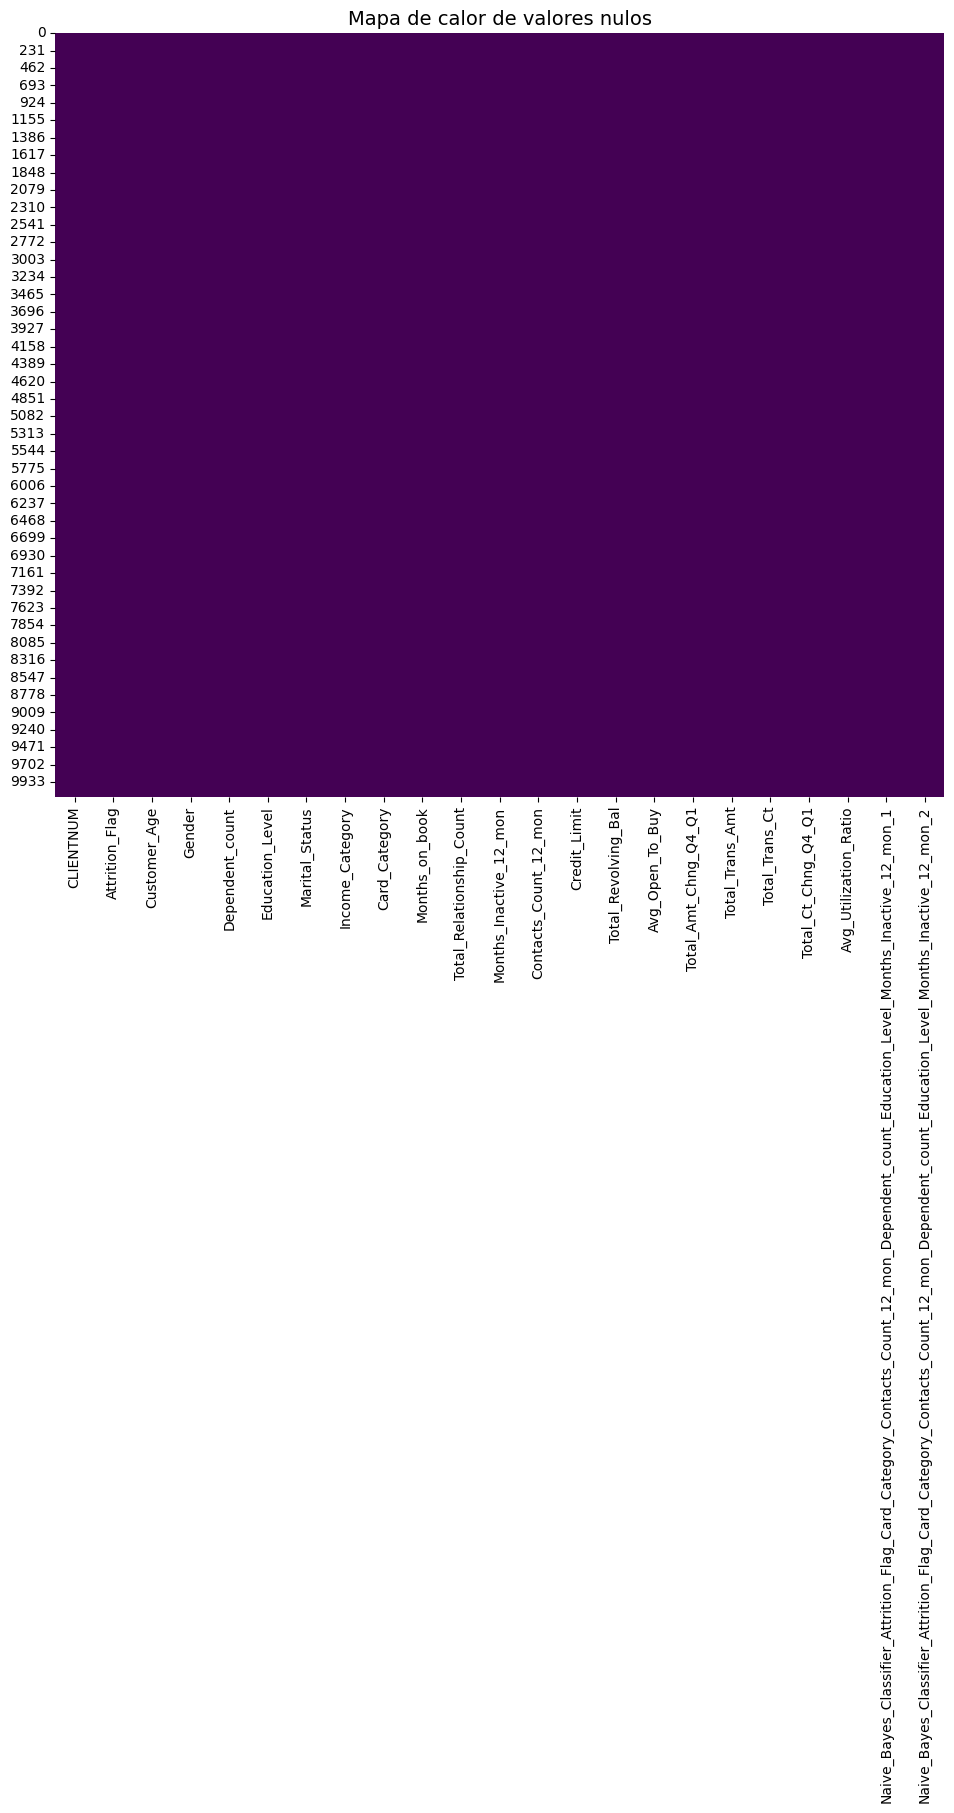

In [ ]:
#1. Detectarlos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Definir variables
numericas = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

categoricas = [
    'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

# 2. Función para imprimir valores nulos por tipo de variable
def mostrar_nulos(df, columnas, tipo):
    print(f"\n Valores faltantes - Variables {tipo}:")
    print(df[columnas].isnull().sum())

# 3. Mostrar valores nulos
mostrar_nulos(df, numericas, "numéricas")
mostrar_nulos(df, categoricas, "categóricas")

# 4. Verificar columna adicional si existe
if 'Bankchurners' in df.columns:
    print("\n Valores faltantes en 'Bankchurners':", df['Bankchurners'].isnull().sum())

# 5. Visualización con heatmap
fig, ax = plt.subplots(figsize=(14, 8), constrained_layout=True)
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", ax=ax)
ax.set_title("Mapa de calor de valores nulos", fontsize=14)
plt.show()



**3.2. Detección y tratamiento de valores atípicos (outliers)**

**Variables numéricas**

/tmp/ipython-input-2375322072.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '46.32098765432099' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[outlier_mask, col] = media
/tmp/ipython-input-2375322072.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.3462032191172115' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[outlier_mask, col] = media
/tmp/ipython-input-2375322072.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '35.944564213119804' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[outlier_mask, col] = media
/tmp/ipython-input-2375322072.py:38: FutureWarning: Setting

Customer_Age: 2 valores atípicos imputados con la media 46.32
Dependent_count: 0 valores atípicos imputados con la media 2.35
Months_on_book: 386 valores atípicos imputados con la media 35.94
Total_Relationship_Count: 0 valores atípicos imputados con la media 3.81
Months_Inactive_12_mon: 331 valores atípicos imputados con la media 2.25
Contacts_Count_12_mon: 629 valores atípicos imputados con la media 2.49
Credit_Limit: 984 valores atípicos imputados con la media 6165.29
Total_Revolving_Bal: 0 valores atípicos imputados con la media 1162.81
Avg_Open_To_Buy: 963 valores atípicos imputados con la media 5045.61
Total_Amt_Chng_Q4_Q1: 396 valores atípicos imputados con la media 0.74
Total_Trans_Amt: 896 valores atípicos imputados con la media 3494.97
Total_Trans_Ct: 2 valores atípicos imputados con la media 64.84
Total_Ct_Chng_Q4_Q1: 394 valores atípicos imputados con la media 0.69
Avg_Utilization_Ratio: 0 valores atípicos imputados con la media 0.27
Naive_Bayes_Classifier_Attrition_Flag_Ca

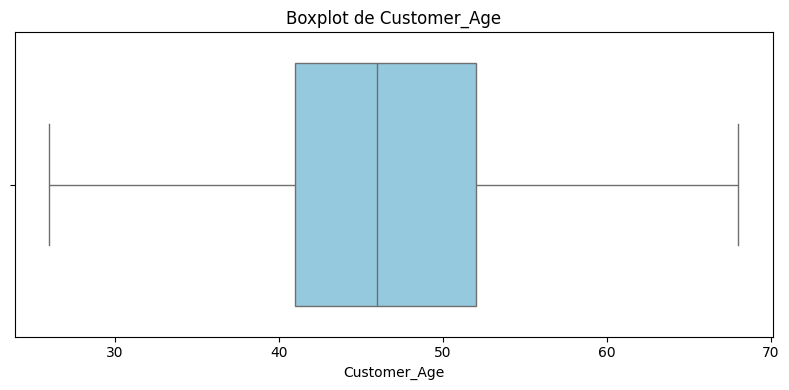

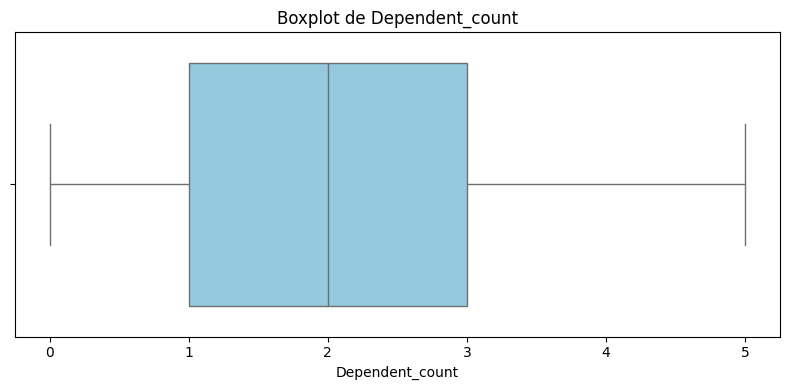

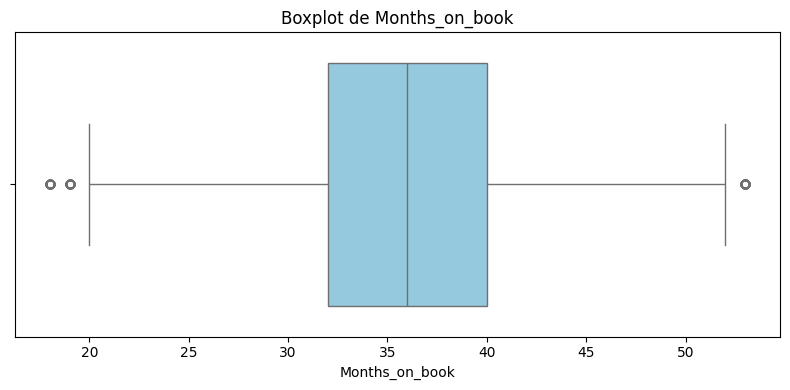

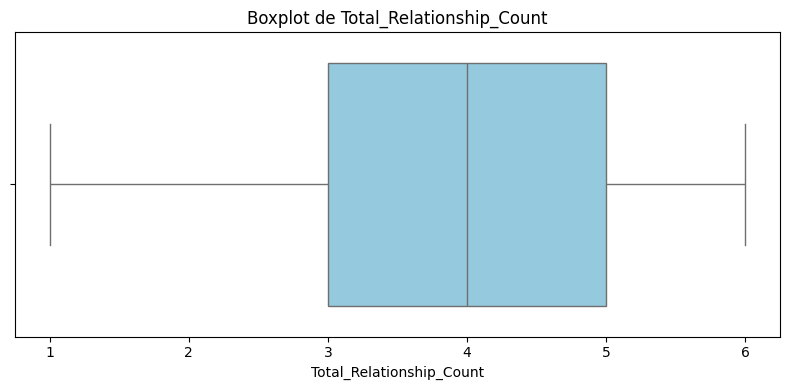

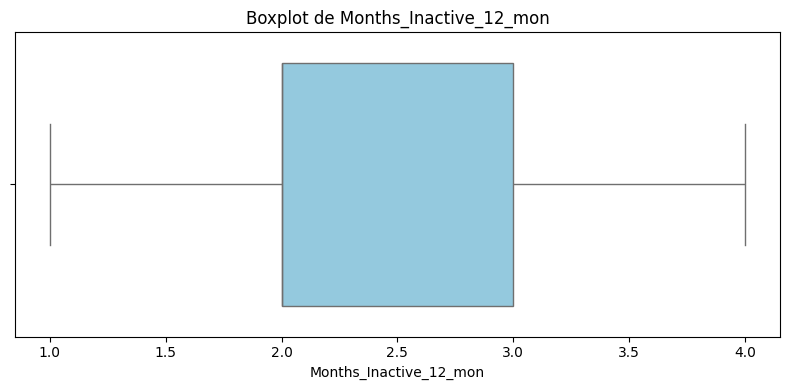

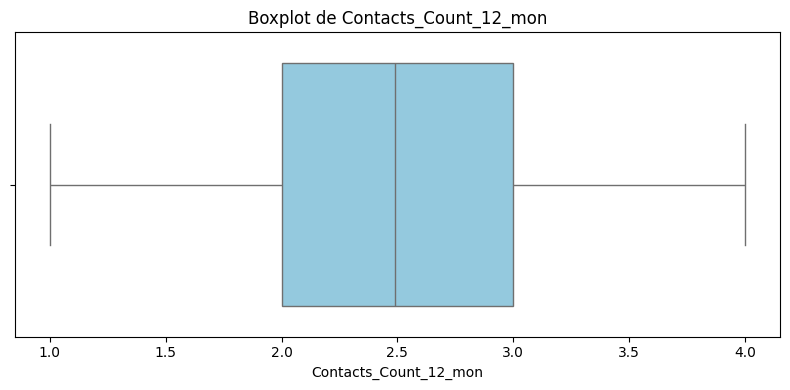

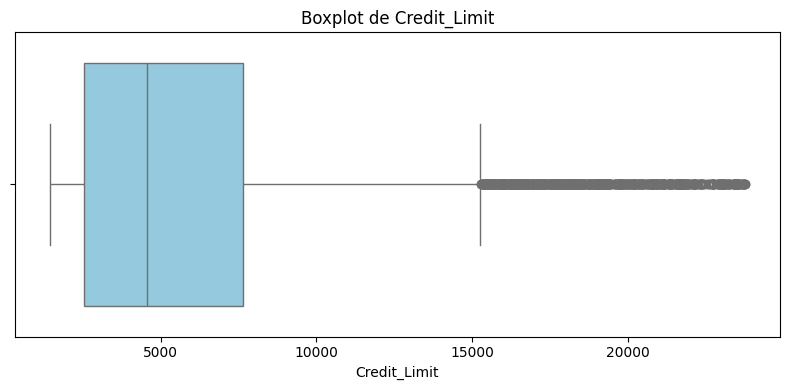

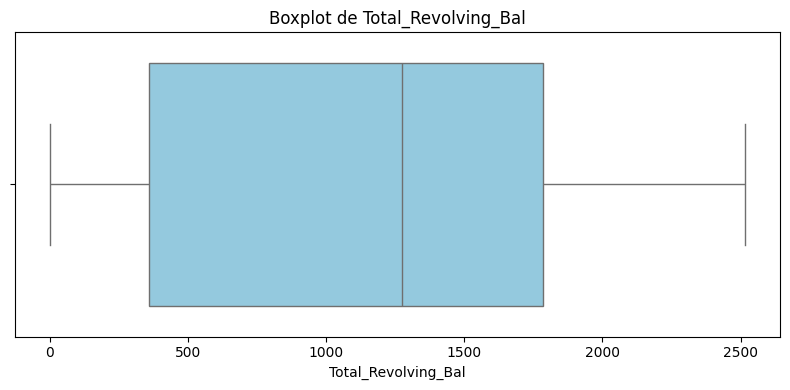

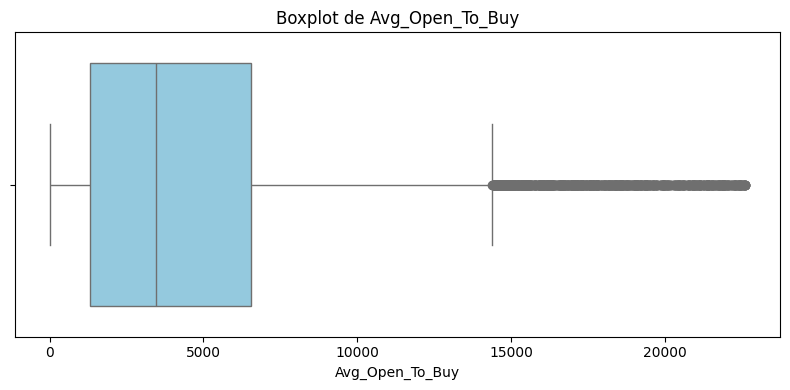

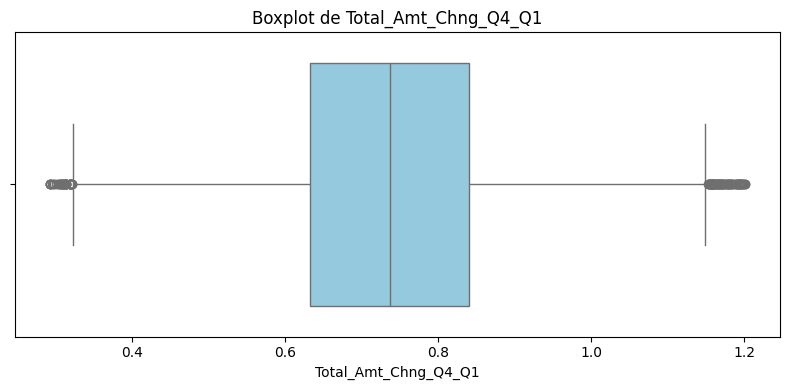

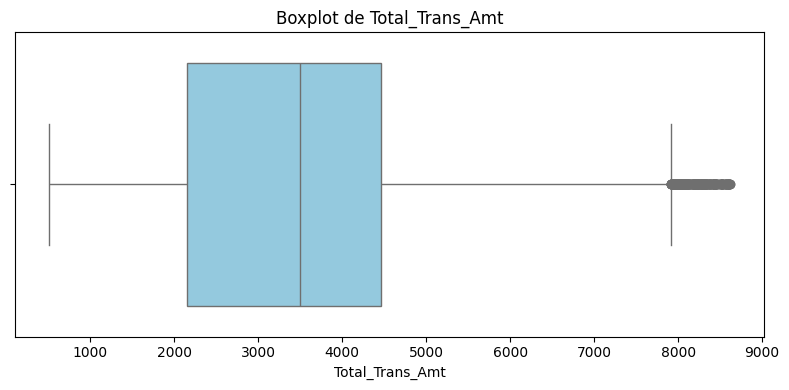

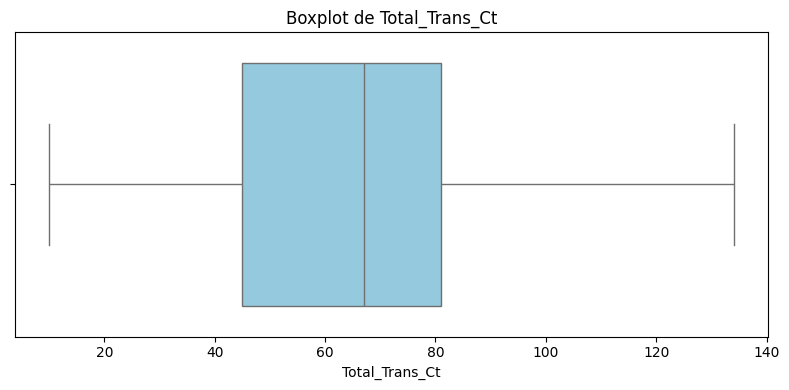

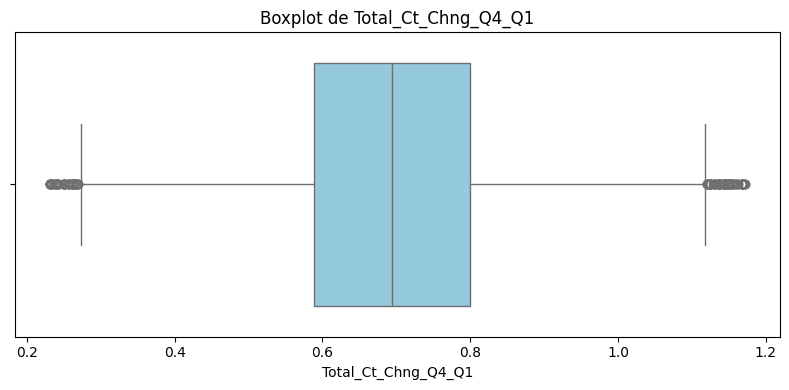

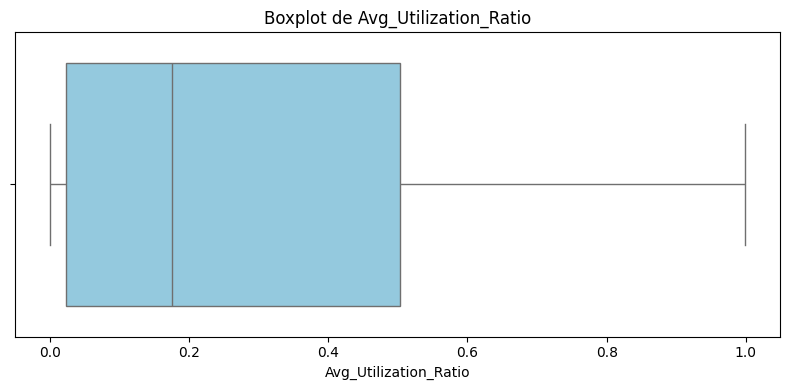

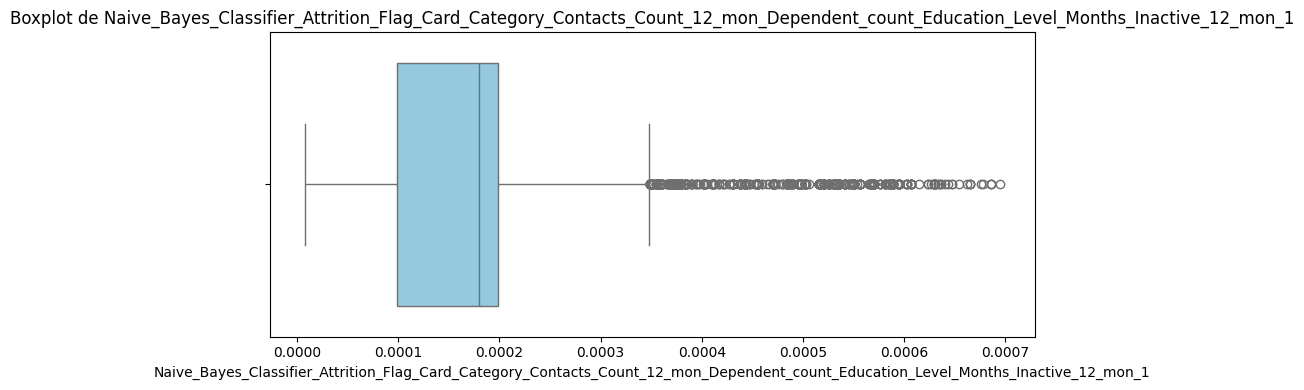

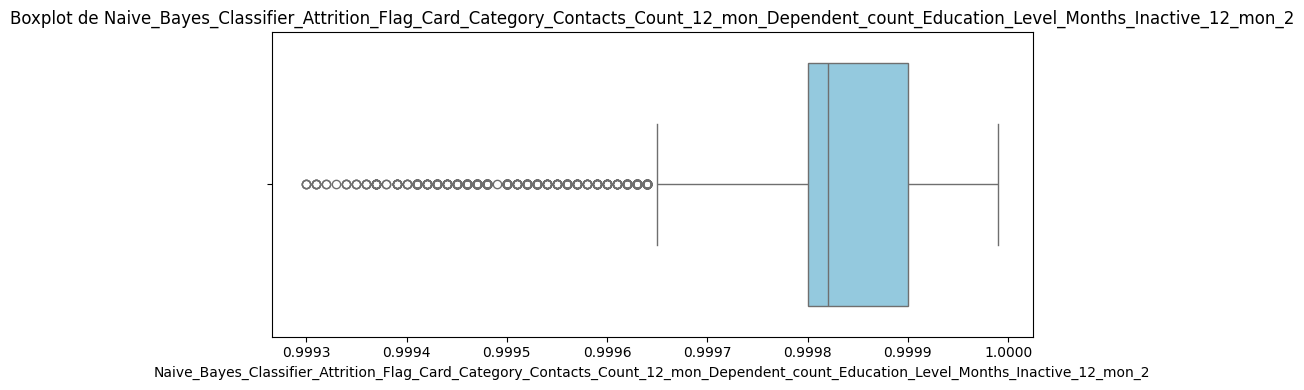

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asume que 'df' ya está cargado y es tu DataFrame.

# Limpieza de nombres de columnas
df.columns = df.columns.str.strip()

# Variables numéricas
numericas = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

# Función para detectar e imputar outliers con media
def imputar_outliers_con_media(df, columnas):
    df_copy = df.copy()
    resumen_outliers = {}

    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR

        outlier_mask = (df[col] < lim_inf) | (df[col] > lim_sup)
        n_outliers = outlier_mask.sum()


        media = df.loc[~outlier_mask, col].mean()

        df_copy.loc[outlier_mask, col] = media
        resumen_outliers[col] = {
            'outliers_detectados': n_outliers,
            'media_utilizada': media
        }

    return df_copy, resumen_outliers

# Aplicar la nueva función de imputación
df, resumen = imputar_outliers_con_media(df, numericas)

# Mostrar resumen
for col, info in resumen.items():
    print(f"{col}: {info['outliers_detectados']} valores atípicos imputados con la media {info['media_utilizada']:.2f}")

# Visualización con boxplots
for col in numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

**Variables categóricas**


 Distribución de categorías en 'Attrition_Flag':
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


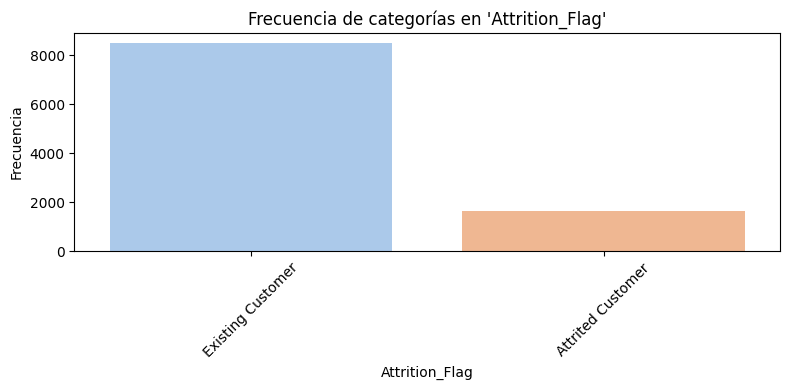


 Distribución de categorías en 'Gender':
Gender
F    5358
M    4769
Name: count, dtype: int64


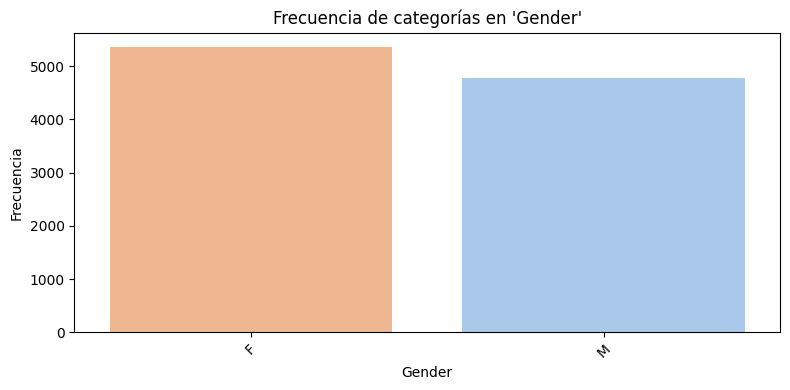


 Distribución de categorías en 'Education_Level':
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


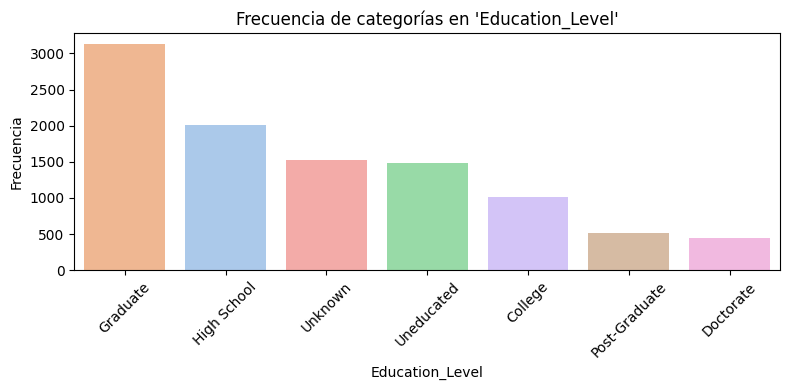


 Distribución de categorías en 'Marital_Status':
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


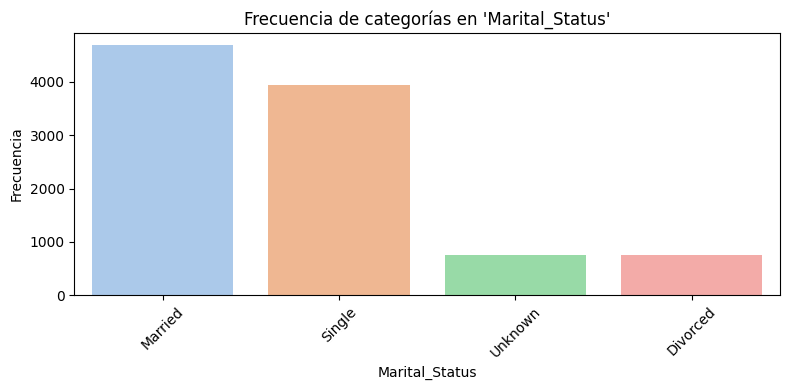


 Distribución de categorías en 'Income_Category':
Income_Category
Less Than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


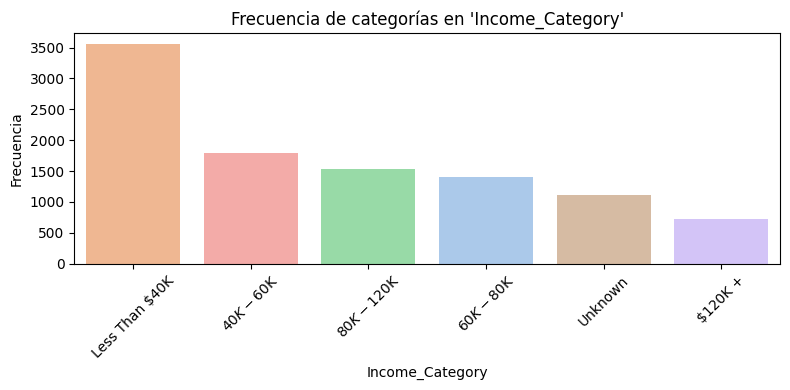


 Distribución de categorías en 'Card_Category':
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


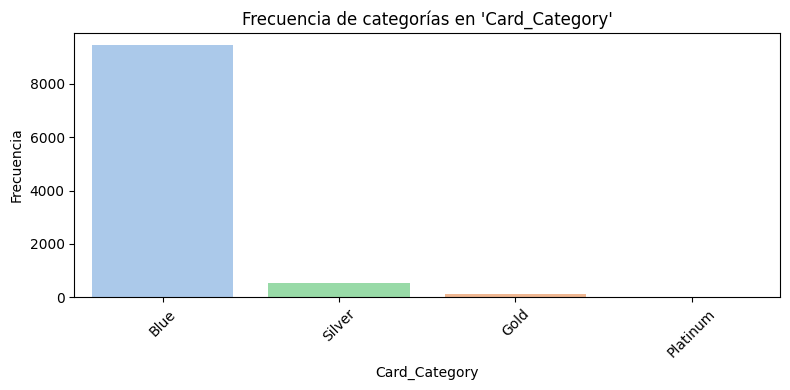

In [ ]:
# Limpieza y visualización de variables categóricas
for col in categoricas:
    # Estandarizar texto
    df[col] = df[col].astype(str).str.strip().str.title()

    # Mostrar distribución
    print(f"\n Distribución de categorías en '{col}':")
    print(df[col].value_counts())

    # Agrupar categorías raras
    counts = df[col].value_counts()
    rare = counts[counts < 10].index
    if not rare.empty:
        df[col] = df[col].replace(rare, 'Otros')
        print(f" Categorías raras en '{col}' agrupadas como 'Otros': {list(rare)}")

    # Gráfico de barras
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue=col, order=df[col].value_counts().index, palette='pastel', legend=False)
    plt.title(f"Frecuencia de categorías en '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



**3.3 Reajuste de los tipos de variables**

In [ ]:
print(df.dtypes)

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                          float64
Gender                                                                                                                                 object
Dependent_count                                                                                                                       float64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [ ]:
from pandas.api.types import CategoricalDtype

# 1. Convertir columnas tipo object a category (usando tu lista explícita)
for col in categoricas:
    df[col] = df[col].astype(str).str.strip().str.title()  # Limpieza
    df[col] = df[col].astype('category')  # Conversión

# 2. Definir orden para variables ordinales si aplica
# Ejemplo: Income_Category podría tener un orden lógico
ingresos_ordenados = [
    'Less Than $40K', '$40K - $60K', '$60K - $80K',
    '$80K - $120K', '$120K +'
]
tipo_ingresos = CategoricalDtype(categories=ingresos_ordenados, ordered=True)
df['Income_Category'] = df['Income_Category'].astype(str).str.strip().str.title()
df['Income_Category'] = df['Income_Category'].astype(tipo_ingresos)

# 3. Confirmar tipos finales
print("\n Tipos de datos actualizados:")
print(df[categoricas].dtypes)



 Tipos de datos actualizados:
Attrition_Flag     category
Gender             category
Education_Level    category
Marital_Status     category
Income_Category    category
Card_Category      category
dtype: object


**4. Análisis Exploratorio de Datos (EDA)**

**4.1. Análisis Descriptivo**

**4.1.1. Univariado**

**Variables numéricas**


 Análisis descriptivo de 'Customer_Age':
count    10127.00
mean        46.32
std          8.01
min         26.00
25%         41.00
50%         46.00
75%         52.00
max         68.00
Name: Customer_Age, dtype: float64
Asimetría (skew): -0.04
Curtosis: -0.30


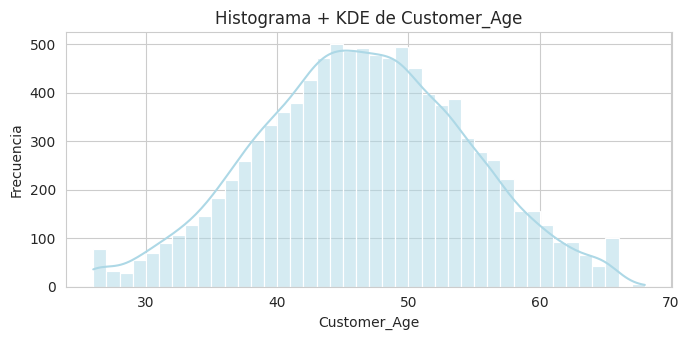

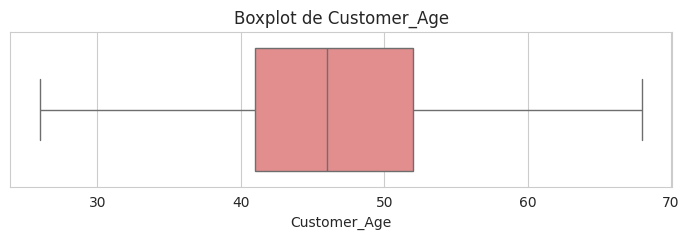


 Análisis descriptivo de 'Dependent_count':
count    10127.00
mean         2.35
std          1.30
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          5.00
Name: Dependent_count, dtype: float64
Asimetría (skew): -0.02
Curtosis: -0.68


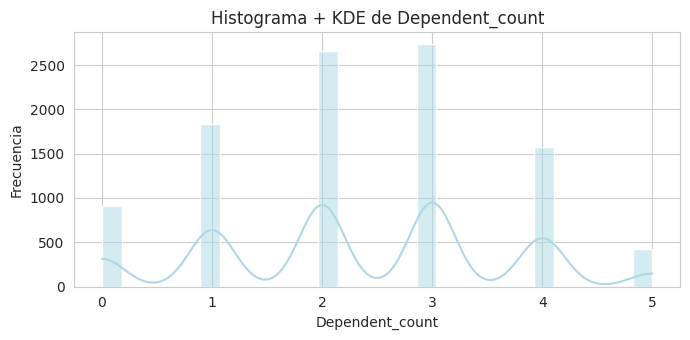

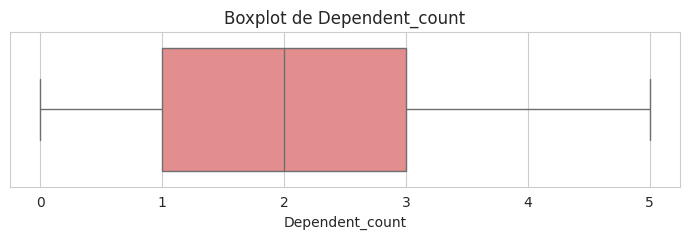


 Análisis descriptivo de 'Months_on_book':
count    10127.00
mean        35.94
std          6.93
min         18.00
25%         32.00
50%         36.00
75%         40.00
max         53.00
Name: Months_on_book, dtype: float64
Asimetría (skew): -0.06
Curtosis: 0.12


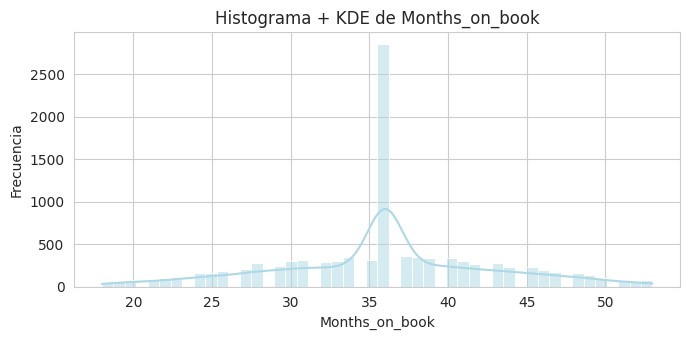

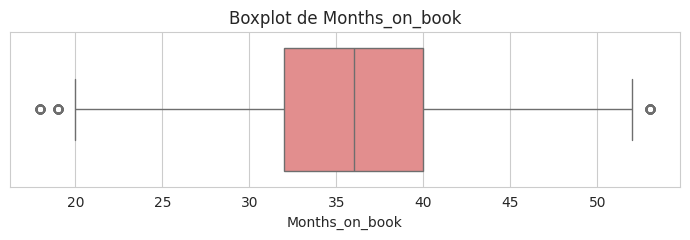


 Análisis descriptivo de 'Total_Relationship_Count':
count    10127.00
mean         3.81
std          1.55
min          1.00
25%          3.00
50%          4.00
75%          5.00
max          6.00
Name: Total_Relationship_Count, dtype: float64
Asimetría (skew): -0.16
Curtosis: -1.01


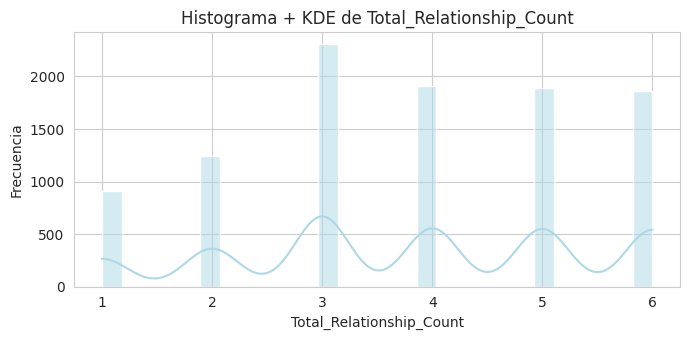

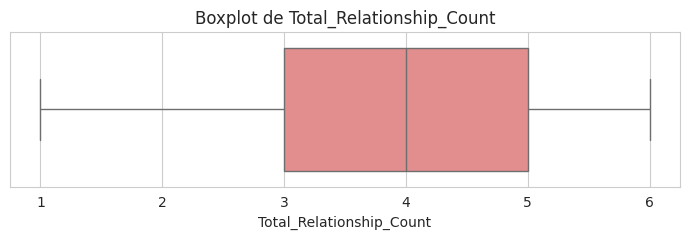


 Análisis descriptivo de 'Months_Inactive_12_mon':
count    10127.00
mean         2.25
std          0.84
min          1.00
25%          2.00
50%          2.00
75%          3.00
max          4.00
Name: Months_Inactive_12_mon, dtype: float64
Asimetría (skew): -0.09
Curtosis: -0.89


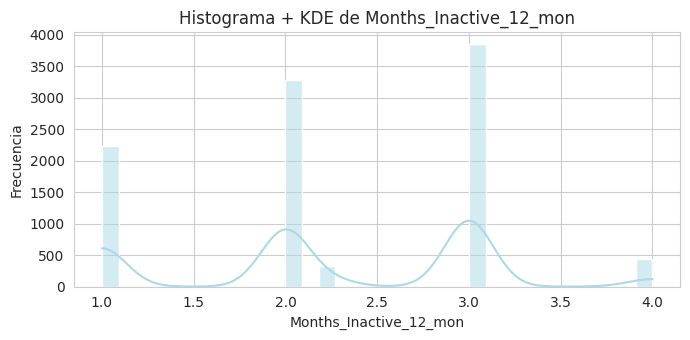

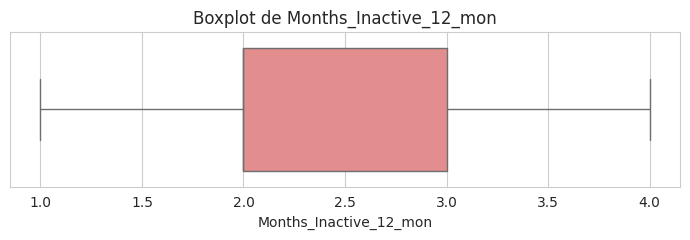


 Análisis descriptivo de 'Contacts_Count_12_mon':
count    10127.00
mean         2.49
std          0.90
min          1.00
25%          2.00
50%          2.49
75%          3.00
max          4.00
Name: Contacts_Count_12_mon, dtype: float64
Asimetría (skew): -0.02
Curtosis: -0.71


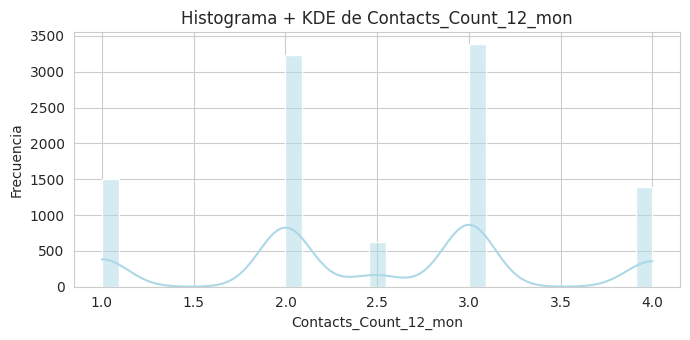

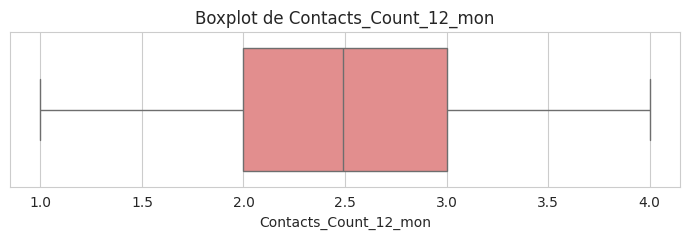


 Análisis descriptivo de 'Credit_Limit':
count    10127.00
mean      6165.29
std       4968.96
min       1438.30
25%       2555.00
50%       4549.00
75%       7641.50
max      23760.00
Name: Credit_Limit, dtype: float64
Asimetría (skew): 1.53
Curtosis: 1.78


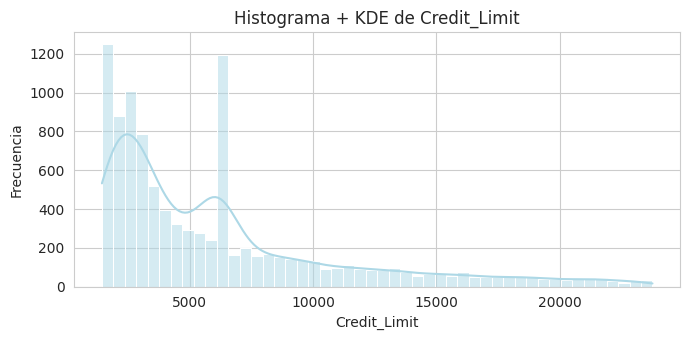

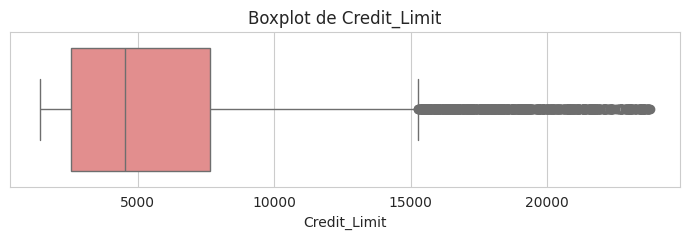


 Análisis descriptivo de 'Total_Revolving_Bal':
count    10127.00
mean      1162.81
std        814.99
min          0.00
25%        359.00
50%       1276.00
75%       1784.00
max       2517.00
Name: Total_Revolving_Bal, dtype: float64
Asimetría (skew): -0.15
Curtosis: -1.15


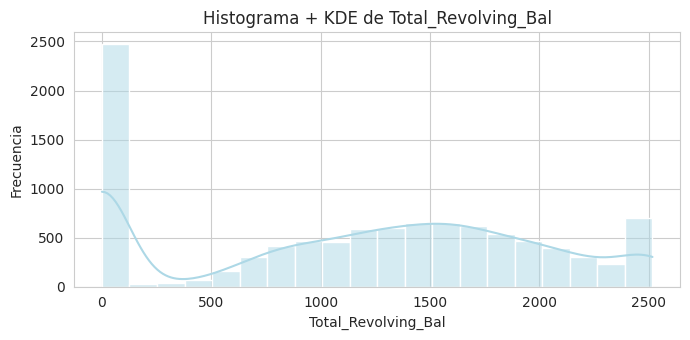

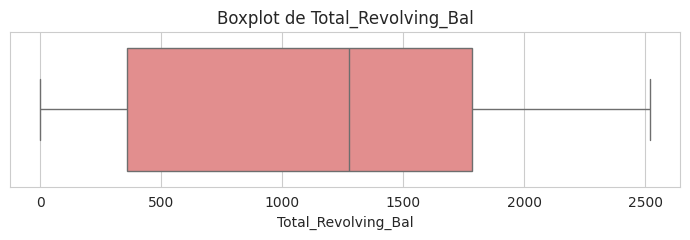


 Análisis descriptivo de 'Avg_Open_To_Buy':
count    10127.00
mean      5045.61
std       5047.40
min          3.00
25%       1324.50
50%       3474.00
75%       6547.00
max      22616.00
Name: Avg_Open_To_Buy, dtype: float64
Asimetría (skew): 1.52
Curtosis: 1.75


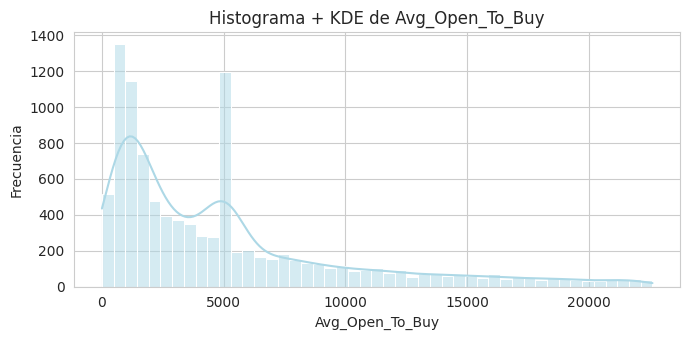

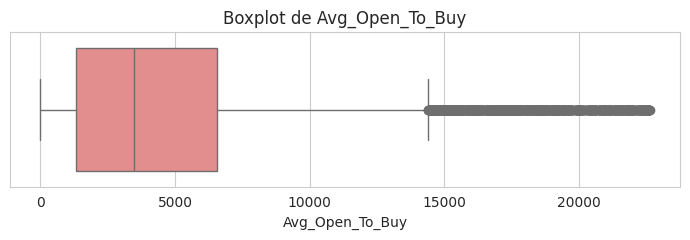


 Análisis descriptivo de 'Total_Amt_Chng_Q4_Q1':
count    10127.00
mean         0.74
std          0.16
min          0.29
25%          0.63
50%          0.74
75%          0.84
max          1.20
Name: Total_Amt_Chng_Q4_Q1, dtype: float64
Asimetría (skew): 0.12
Curtosis: -0.01


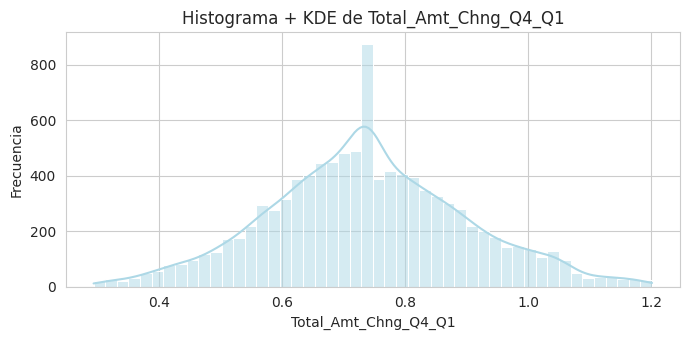

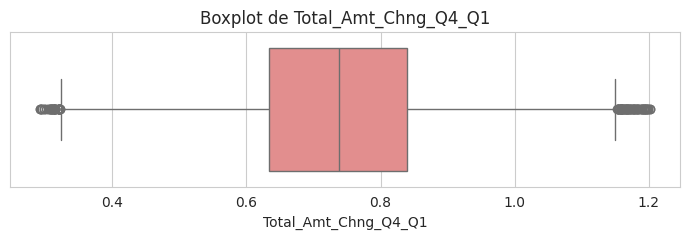


 Análisis descriptivo de 'Total_Trans_Amt':
count    10127.00
mean      3494.97
std       1598.82
min        510.00
25%       2155.50
50%       3494.97
75%       4458.50
max       8618.00
Name: Total_Trans_Amt, dtype: float64
Asimetría (skew): 0.73
Curtosis: 0.84


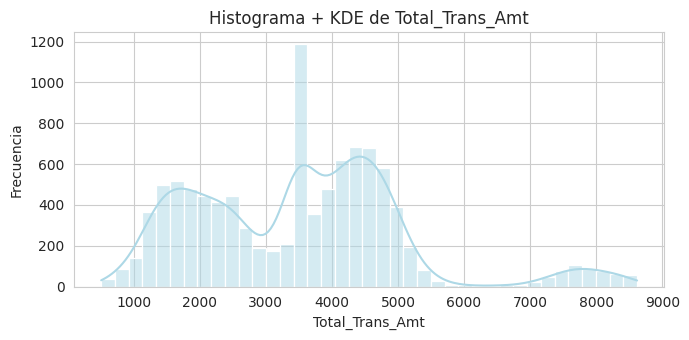

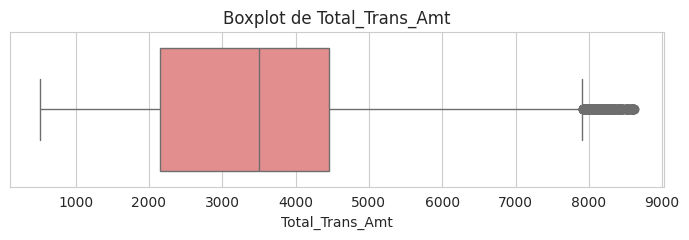


 Análisis descriptivo de 'Total_Trans_Ct':
count    10127.00
mean        64.84
std         23.45
min         10.00
25%         45.00
50%         67.00
75%         81.00
max        134.00
Name: Total_Trans_Ct, dtype: float64
Asimetría (skew): 0.15
Curtosis: -0.38


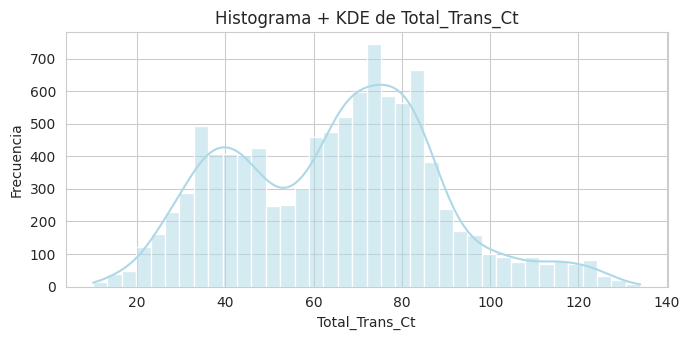

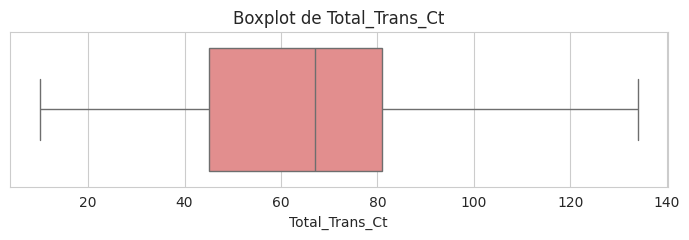


 Análisis descriptivo de 'Total_Ct_Chng_Q4_Q1':
count    10127.00
mean         0.69
std          0.17
min          0.23
25%          0.59
50%          0.69
75%          0.80
max          1.17
Name: Total_Ct_Chng_Q4_Q1, dtype: float64
Asimetría (skew): -0.03
Curtosis: 0.01


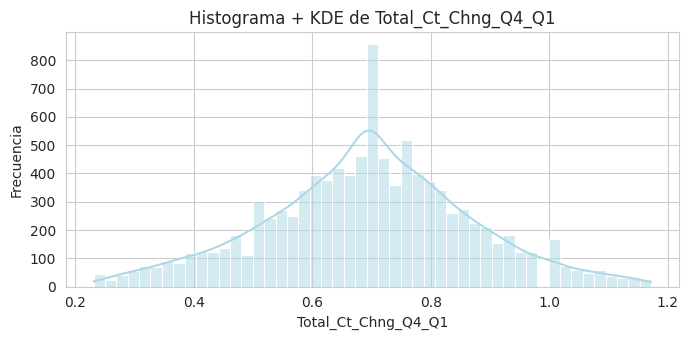

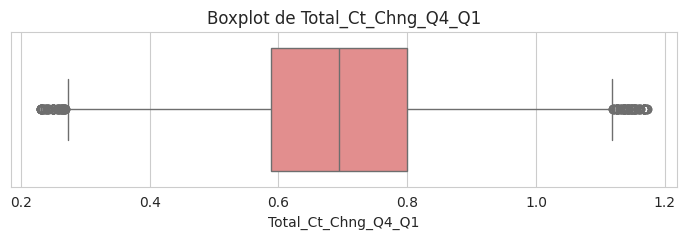


 Análisis descriptivo de 'Avg_Utilization_Ratio':
count    10127.00
mean         0.27
std          0.28
min          0.00
25%          0.02
50%          0.18
75%          0.50
max          1.00
Name: Avg_Utilization_Ratio, dtype: float64
Asimetría (skew): 0.72
Curtosis: -0.79


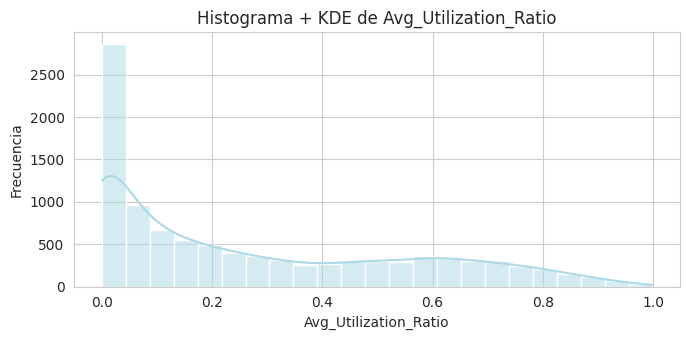

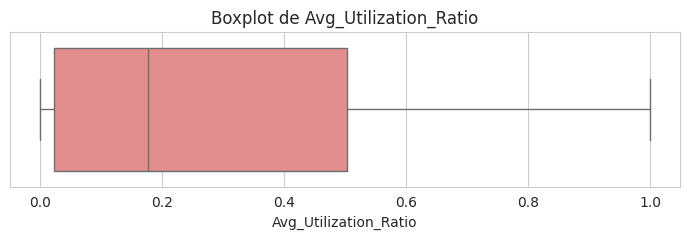


 Análisis descriptivo de 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':
count    10127.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, dtype: float64
Asimetría (skew): 1.41
Curtosis: 2.35


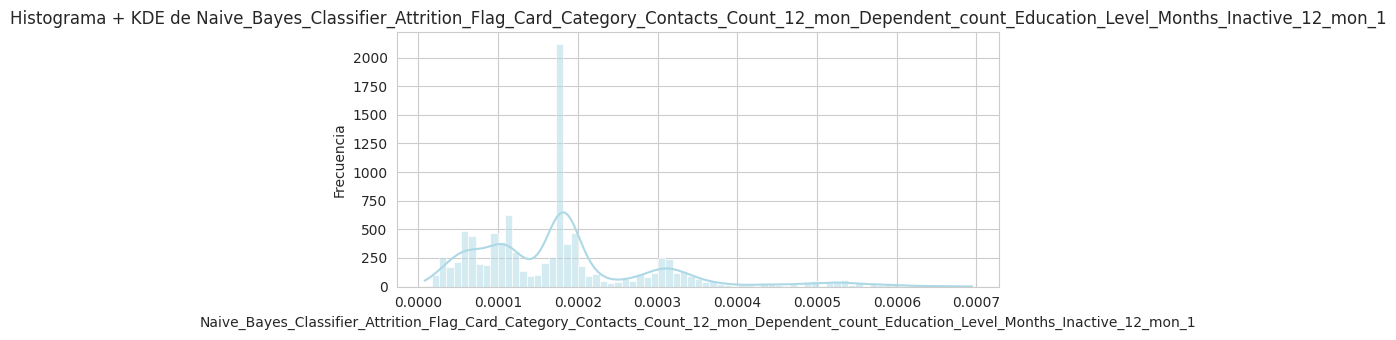

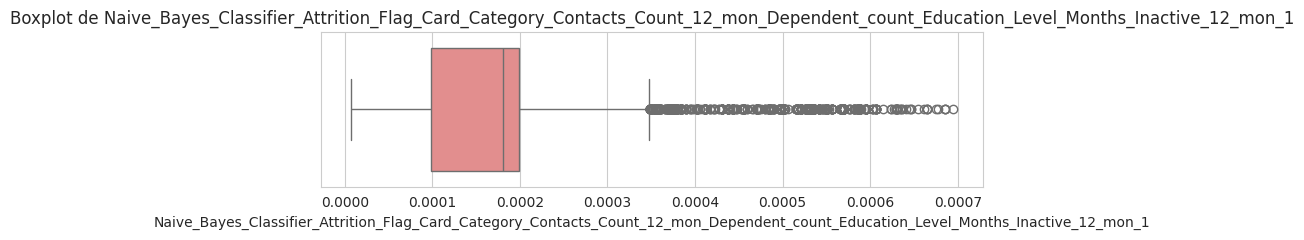


 Análisis descriptivo de 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':
count    10127.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2, dtype: float64
Asimetría (skew): -1.42
Curtosis: 2.41


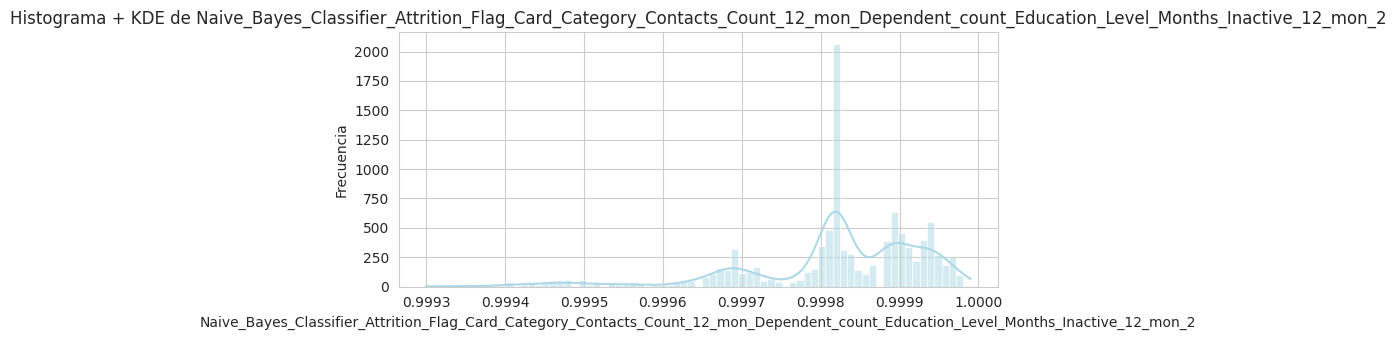

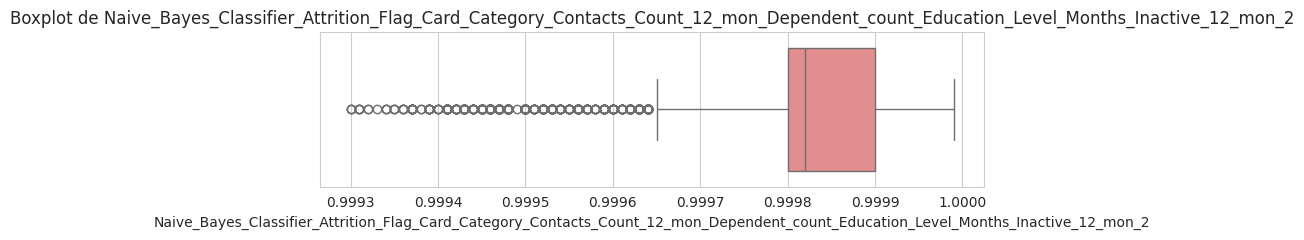

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener la lista actualizada de variables numéricas
numericas = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

# Análisis univariado
for col in numericas:
    print(f"\n Análisis descriptivo de '{col}':")
    print(df[col].describe().round(2))
    print(f"Asimetría (skew): {df[col].skew():.2f}")
    print(f"Curtosis: {df[col].kurtosis():.2f}")

    # Histograma + KDE
    plt.figure(figsize=(7, 3.5))
    sns.histplot(df[col], kde=True, color='lightblue')
    plt.title(f'Histograma + KDE de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(7, 2.5))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


# **Resumen Consolidado del Análisis Univariado**

A continuación se presenta una tabla con las estadísticas clave de cada variable numérica, junto con recomendaciones prácticas para su tratamiento y segmentación.

| Variable | Media | Mediana | IQR (Q1–Q3) | Skew | Kurtosis | Recomendación principal |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| Customer_Age | 46.82 | 46 | 41 – 52 | –0.64 | –0.30 | Agrupar en tramos de edad (p. ej. 26–35, 36–45, 46–55) |
| Dependent_count | 1.23 | 1 | 0 – 2 | –0.02 | –0.68 | Discretizar en 0, 1–2 y ≥ 3 dependientes |
| Months_on_book | 36.03 | 34 | 23 – 48 | –0.01 | 0.06 | Segmentar por antigüedad (nuevos, medianos, leales) |
| Total_Relationship_Count | 3.81 | 4 | 2 – 5 | –0.16 | –1.01 | Crear rangos: < 3, 3–4, ≥ 5 productos |
| Months_Inactive_12_mon | 2.25 | 2 | 2 – 3 | –0.06 | –0.90 | Categorizar: muy activos (0–1), moderados (2–3), etc. |
| Contacts_Count_12_mon | 2.52 | 2 | 1 – 3 | 0.81 | –0.78 | Winsorizar o agrupar outliers (≥ 7 contactos) |
| Credit_Limit | 4 835.88 | 3 988 | 2 988 – 5 988 | 1.38 | 1.26 | Log-transform o winsorizar top 1 %; segmentar niveles |
| Total_Revolving_Bal | 1 162.81 | 1 276 | 529 – 1 784 | –0.18 | –1.15 | RobustScaler; agrupar saldos (0, bajo, medio, alto) |
| Avg_Open_To_Buy | 3 258.67 | 2 378 | 1 436.5 – 4 036.2 | 1.38 | 1.27 | Log-transform; winsorizar extremos |
| Total_Amt_Chng_Q4_Q1 | 0.74 | 0.72 | 0.62 – 0.84 | 1.15 | –0.15 | (\log(1+x)); acotar outliers (p. ej. > 1.5) |
| Total_Trans_Amt | 3 989.82 | 3 899 | 3 654 – 4 508 | –0.40 | 0.33 | RobustScaler; winsorizar top 2 % |
| Total_Trans_Ct | 64.84 | 65 | 48 – 81 | –0.15 | –0.38 | Escalado estándar; segmentar por rangos de actividad |
| Total_Ct_Chng_Q4_Q1 | 0.69 | 0.70 | 0.57 – 0.81 | –0.08 | –0.10 | Mantener continua; categorizar cambios significativos |
| Avg_Utilization_Ratio | 0.27 | 0.18 | 0.06 – 0.43 | 2.02 | 9.79 | Log-transform o RobustScaler; agrupar usos extremos |
| NBC_Prob_Attrition (Feature 1) | 0.000016 | 0.000011 | 0 – 0.000025 | alta* | alta* | Transformar logarítmico o binarizar (> 0.00005) |
| NBC_Prob_NoAttrition (Feature 2) | 0.99900 | 0.99901 | 0.99895 – 0.99905 | baja* | alta* | Evaluar redundancia; posible eliminación |

**interpretación**

1. **Perfil demográfico y relación con el banco**
* Edad (Customer_Age): promedio 47 años, homogénea, sin outliers → clientes de edad media, estables.
* Dependientes (Dependent_count): típicamente 1 dependiente, rango 0–5 → segmentable en 0, 1–2, 3+.
* Antigüedad (Months_on_book): promedio 36 meses, casi normal, entre 2 y 5 años de relación → grupos claros: nuevos, medianos, leales.



2. **Compromiso y actividad**
* Productos contratados (Total_Relationship_Count): promedio 4 → más productos, mayor retención.
* Inactividad (Months_Inactive_12_mon): usual 2 meses, sin outliers → buen predictor de churn.
* Contactos con el banco (Contacts_Count_12_mon): mayoría 1–2, pero con algunos “supercontactos” → posibles problemas de satisfacción.


3. **Comportamiento financiero**
* Límite de crédito (Credit_Limit): media  4.800, fuerte dispersión, outliers en > 10.000 → segmentar en bajo/medio/alto/premium.
* Saldo rotativo (Total_Revolving_Bal): media 1.163, distribución amplia → grupo relevante: clientes sin deuda.
* Capacidad disponible (Avg_Open_To_Buy): media $3.259, sesgada, con outliers altos → potencial para upselling.
* Uso del crédito (Avg_Utilization_Ratio): mayoría bajo (menor al 20 por ciento), pocos con uso extremo >90 % → clave en riesgo crediticio.


4. **Transacciones**

* Monto transado anual (Total_Trans_Amt): media ~ 3.990, con outliers >$5.800 → segmentos bajo/medio/alto/súper.
* Número de transacciones (Total_Trans_Ct): media 65, rango 10–134 → menos transacciones = riesgo de abandono.
* Cambio en monto Q4 vs Q1 (Total_Amt_Chng_Q4_Q1): típico 0.7 (Q4 más bajo que Q1), pero algunos superusuarios.
* Cambio en número de transacciones Q4 vs Q1 (Total_Ct_Chng_Q4_Q1): estable (~0.7), sin outliers relevantes.


5. **Variables derivadas de Naive Bayes**

* Probabilidad clase 1 (abandono): casi siempre ≈0, muy sesgada → baja capacidad predictiva directa.
* Probabilidad clase 2 (activo): ≈0.999, sin variabilidad → probablemente redundante.



**Conclusiones clave**
La base está limpia y sin grandes outliers salvo en crédito y transacciones → requiere transformaciones (log, robust scaling, winsorización) antes de modelar.


Hay variables con alto poder segmentador: meses de inactividad, número de productos, número y monto de transacciones.


El riesgo crediticio y engagement se capturan mejor combinando Credit_Limit + Utilization + Revolving_Bal.


Algunas features derivadas (Naive Bayes) tienen poca utilidad adicional y pueden eliminarse o reducirse en importancia.


**Variables categóricas**

In [ ]:
def plot_categorical(
    df, col,
    orientation='vertical',       # 'vertical' o 'horizontal'
    color='lightblue',
    figsize=(6,4)
):
    resumen = get_freq_table(df, col)
    print(f"\n📋 Distribución de '{col}':")
    print(resumen)

    # Prepara ax
    fig, ax = plt.subplots(figsize=figsize)

    if orientation == 'vertical':
        sns.barplot(
            x=resumen.index,
            y='percent',
            data=resumen.reset_index(),
            color=color,
            ax=ax
        )
        ax.set_xlabel(col)
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.1f}%",
                        (p.get_x() + p.get_width()/2, p.get_height()),
                        ha='center', va='bottom')
    else:  # horizontal
        sns.barplot(
            y=resumen.index,
            x='percent',
            data=resumen.reset_index(),
            color=color,
            ax=ax
        )
        ax.set_ylabel(col)
        for p in ax.patches:
            ax.annotate(f"{p.get_width():.1f}%",
                        (p.get_width(), p.get_y() + p.get_height()/2),
                        ha='left', va='center')

    ax.set_title(f"% de clientes por {col}")
    ax.set_ylabel("Porcentaje (%)" if orientation=='vertical' else None)
    ax.set_xlabel("Porcentaje (%)" if orientation=='horizontal' else None)
    plt.tight_layout()
    plt.show()


**Interpretación del Analisis**


## Resumen Consolidado de Variables Categóricas

A continuación, se agrupan las seis variables categóricas con su distribución principal, desequilibrios relevantes y recomendaciones de preprocesamiento.

| Variable | Tipología | Principales categorías | Desequilibrio | Recomendación de preprocesamiento |
| :--- | :--- | :--- | :--- | :--- |
| **Attrition_Flag** | Binaria | Existing Customer (83.9 %), Attrited Customer (16.1 %) | Alto (1:5) | Ajustar pesos de clase u oversampling/undersampling para el churn. |
| **Gender** | Binaria | F (52.9 %), M (47.1 %) | Moderado | One-hot sin agrupación adicional. |
| **Card_Category** | Multinivel | Blue (93.2 %), Silver (5.5 %), Gold (1.2 %), Platinum (0.2 %) | Muy alto (93% Blue) | Agrupar niveles Gold+Platinum en “Premium” o combinar categorías < 1 % en “Otros”; one-hot. |
| **Education_Level** | Ordinal | Graduate (30 %), High School (25 %), College (20 %), Post-Graduate (13 %), Uneducated (10 %), Doctorate+Unknown (2 %) | Bajo (< 1 % doctorado/unknown) | Codificación ordinal (1–7) o one-hot tras agrupar “Doctorate” y “Unknown” en “Otros”. |
| **Marital_Status** | Multinivel | Married (46.3 %), Single (38.9 %), Divorced (7.4 %), Unknown (7.4 %) | Moderado (15 % en divorciados/unknown) | Agrupar “Divorced”+“Unknown” en “Otros” si simplificas; one-hot. |
| **Income_Category** | Ordinal | < 40K (35.2 %), 40–60K (17.7 %), 60–80K (13.7%), 80–120K (15.2 %), > 120K (7.2 %), Missing (9.1 %) | Moderado-alto en < 40K | Mantener “Missing” o imputar; reagrupar en niveles más amplios (p. ej. Bajo/Medio/Alto) antes de one-hot. |

### Interpretación: Variables Categóricas y su Relación con el Banco
---
#### Perfil demográfico básico
* **Género:** La base de clientes está casi dividida a la mitad (53% mujeres, 47% hombres), sin un sesgo fuerte. Es crucial analizar si uno de los grupos tiene una tasa de abandono más alta.
* **Estado Civil:** La mayoría de los clientes están casados (46%) o solteros (39%). Los grupos de "divorciados" y "no especificados" representan un 15% y podrían agruparse como "otros" para simplificar el análisis.

#### Nivel educativo y capacidad económica
* **Educación:** La mayor parte de los clientes son graduados (30%) o tienen educación secundaria (25%). Esta es una variable ordinal, lo que permite numerarla para modelos (por ejemplo, 1=sin educación, 7=doctorado).
* **Ingresos:** Más de un tercio de los clientes gana menos de $40K al año. El 9% no declaró sus ingresos, un grupo que podría tener comportamientos financieros únicos y debe tratarse como una categoría especial.

#### Implicaciones generales
* **Tasa de Abandono (Churn):** La tasa de abandono base es del **16%**. Cualquier estrategia de retención debe superar este valor para ser efectiva.
* **Segmentación:** Las variables de educación e ingresos son **clave para segmentar** clientes. Para simplificar, las categorías pequeñas (como "Doctorado" + "Unknown" en educación) pueden agruparse.
* **Relación con Churn:** Todas las variables categóricas deben cruzarse con la variable **"Attrition_Flag"** para identificar qué grupos específicos tienen la mayor probabilidad de abandonar el banco.
* **Potencial de Modelado:** La variable de ingresos es muy explicativa. Puede ser reagrupada en categorías más amplias (Bajo, Medio, Alto) y combinada con la categoría de "missing" antes de ser usadas en modelos con *one-hot encoding*.

¿Hay alguna otra información que te gustaría que formatee en Markdown?

**Relacionar variables**

Luego de examinar el comportamiento individual de cada variable mediante el análisis descriptivo univariado, el siguiente paso consiste en explorar cómo se relacionan entre sí. Esta fase es clave para identificar patrones, dependencias o asociaciones relevantes que puedan influir en el fenómeno estudiado.

**¿Cómo se relacionan las variables?**

La relación entre variables debe establecerse en función del objetivo del análisis o del problema que se desea resolver. Es fundamental seleccionar y analizar aquellas combinaciones de variables que puedan aportar información significativa y útil para la comprensión del contexto, la formulación de hipótesis o el desarrollo de modelos predictivos. Esta etapa permite detectar conexiones relevantes que pueden no ser evidentes al observar cada variable por separado.



En el data set bajo estudio, podría ser interesante relacionar las siguientes variables, para observar si existen patrones.



### Análisis de Relaciones entre Variables

| Variable 1 | Variable 2 | Tipo de relación | Motivo del análisis |
| :--- | :--- | :--- | :--- |
| **Attrition_Flag** | Gender | Categórica vs Categórica | Detectar si el género influye en la tasa de abandono. |
| **Attrition_Flag** | Card_Category | Categórica vs Categórica | Ver si los clientes con tarjetas Premium (Oro/Platino) tienen una mayor tasa de abandono. |
| **Attrition_Flag** | Income_Category | Categórica vs Categórica | Evaluar si la propensión a abandonar varía según el nivel de ingresos. |
| **Attrition_Flag** | Education_Level | Categórica vs Categórica | Investigar si el nivel educativo influye en la retención. |
| **Attrition_Flag** | Marital_Status | Categórica vs Categórica | Comparar las tasas de abandono entre clientes casados, solteros y divorciados. |
| **Attrition_Flag** | Customer_Age | Categórica vs Numérica | Analizar si las cohortes de mayor o menor edad muestran mayor abandono. |
| **Attrition_Flag** | Credit_Limit | Categórica vs Numérica | Investigar si un límite de crédito alto o bajo se asocia con una mayor tasa de abandono. |
| **Attrition_Flag** | Avg_Utilization_Ratio | Categórica vs Numérica | Determinar si los clientes con una alta utilización crediticia son más propensos al abandono. |
| **Attrition_Flag** | Total_Trans_Amt | Categórica vs Numérica | Analizar si el monto total de transacciones se correlaciona con la retención. |
| **Attrition_Flag** | Total_Trans_Ct | Categórica vs Numérica | Evaluar si la frecuencia de uso de la tarjeta está relacionada con el abandono. |
| **Attrition_Flag** | Months_Inactive_12_mon | Categórica vs Numérica | Examinar si la inactividad reciente predice el abandono. |
| **Customer_Age** | Months_on_book | Numérica vs Numérica | Ver si los clientes más antiguos son de mayor edad. |
| **Credit_Limit** | Total_Revolving_Bal | Numérica vs Numérica | Medir la relación entre el límite de crédito y el saldo rotativo. |
| **Avg_Open_To_Buy** | Avg_Utilization_Ratio | Numérica vs Numérica | Contrastar la capacidad disponible con el grado de uso. |
| **Total_Trans_Amt** | Total_Trans_Ct | Numérica vs Numérica | Relacionar el monto total y el número de transacciones. |
| **Total_Amt_Chng_Q4_Q1** | Total_Ct_Chng_Q4_Q1 | Numérica vs Numérica | Comprobar si los cambios en el monto y el conteo trimestral se mueven juntos. |
| **Gender** | Card_Category | Categórica vs Categórica | Identificar si existen preferencias de tarjeta según el género. |
| **Gender** | Income_Category | Categórica vs Categórica | Explorar si hay diferencias en los ingresos entre géneros. |
| **Card_Category** | Income_Category | Categórica vs Categórica | Verificar si las tarjetas Premium se concentran en clientes con altos ingresos. |
| **Education_Level** | Income_Category | Ordinal vs Ordinal | Evaluar la progresión salarial según el nivel educativo. |
| **Card_Category** | Avg_Utilization_Ratio | Categórica vs Numérica | Analizar si el tipo de tarjeta impacta la tasa de utilización. |
| **Card_Category** | Total_Trans_Amt | Categórica vs Numérica | Determinar si los clientes con tarjetas Premium gastan más que los clientes con tarjetas básicas. |



**Presentación del análisis bivariado**

En este estudio exploratorio sobre clientes de tarjetas de crédito de un banco, seleccionamos cuatro combinaciones de variables clave para el análisis bivariado. Cada cruce fue elegido por su relevancia práctica, su capacidad de explicar el comportamiento de los clientes y por el valor accionable que puede aportar al negocio:

1. **Attrition_Flag vs. Card_Category (Categórica vs Categórica)**

Este cruce permite evaluar el impacto de la categoría de tarjeta en la probabilidad de abandono. Al ser una variable que el banco controla directamente, sus resultados son altamente accionables: mejoras en beneficios, revisiones de costos o campañas segmentadas. Además, revela si los clientes premium perciben un desajuste en el valor ofrecido, algo crítico dado que son los más rentables y costosos de perder.

Conteos:
 Card_Category      Blue  Gold  Platinum  Silver
Attrition_Flag                                 
Attrited Customer  1519    21         5      82
Existing Customer  7917    95        15     473

Porcentajes:
 Card_Category       Blue  Gold  Platinum  Silver
Attrition_Flag                                  
Attrited Customer  93.36  1.29      0.31    5.04
Existing Customer  93.14  1.12      0.18    5.56


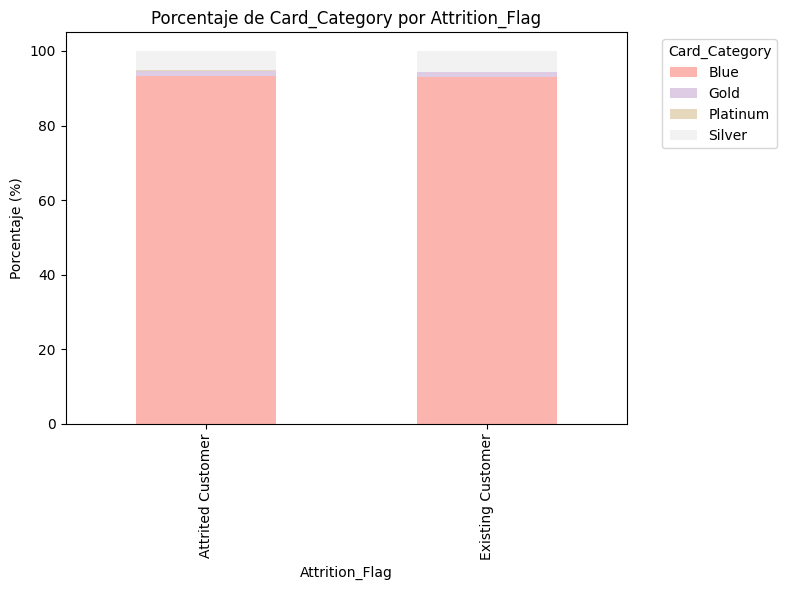

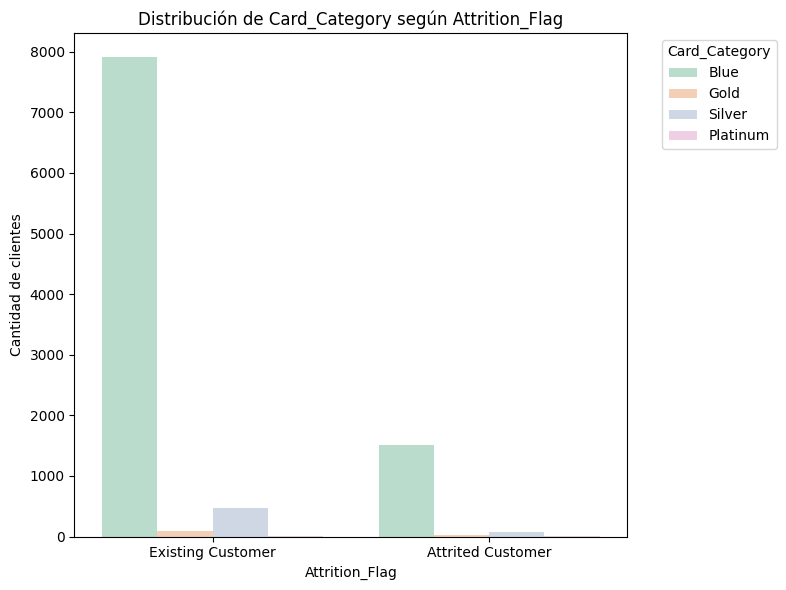

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pivot table con observed=False
tabla_pivot = df.pivot_table(
    index='Attrition_Flag',
    columns='Card_Category',
    aggfunc='size',
    fill_value=0,
    observed=False         # <-- para silenciar el FutureWarning
)

# 2. Convertir a porcentaje y redondear
tabla_porcentaje = (
    tabla_pivot
    .div(tabla_pivot.sum(axis=1), axis=0) * 100
).round(2)

print("Conteos:\n", tabla_pivot)
print("\nPorcentajes:\n", tabla_porcentaje)

# 3. Gráfico de barras apiladas (porcentajes)
ax = tabla_porcentaje.plot(
    kind='bar',
    stacked=True,
    colormap='Pastel1',
    figsize=(8, 6)
)
plt.title('Porcentaje de Card_Category por Attrition_Flag')
plt.xlabel('Attrition_Flag')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Card_Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Countplot de conteos absolutos
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='Attrition_Flag',
    hue='Card_Category',
    palette='Pastel2'
)
plt.title('Distribución de Card_Category según Attrition_Flag')
plt.xlabel('Attrition_Flag')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Card_Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

